This project involves building and evaluating multiple classification models to detect breast cancer based on diagnostic features. Data is collected from Kaggle.

---



In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv("/content/data.csv") # Loading the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info() # Displaying basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe() # Statistical summary of the dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Axes: >

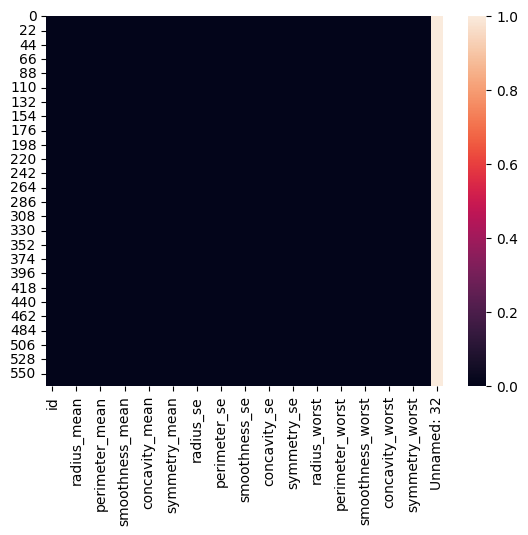

In [6]:
# Visualizing missing values using heatmap
# Plotting a heatmap to visualize where missing values (NaN) are present
sns.heatmap(data.isnull())

In [7]:
data.drop(["Unnamed: 32", "id"],axis=1, inplace=True) # Dropping unnecessary columns: 'Unnamed: 32' and 'id'

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.diagnosis = [1 if value == "M" else 0 for value in data.diagnosis] # Encoding the target variable: Malignant (M) -> 1, Benign (B) -> 0

<Axes: ylabel='count'>

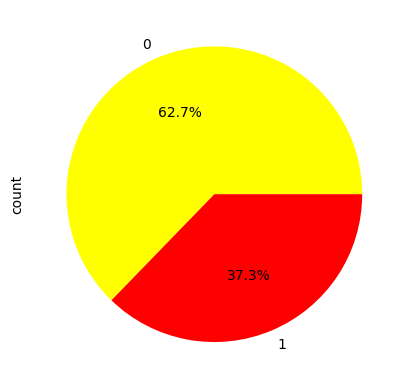

In [10]:
# Plotting distribution of target variable
data['diagnosis'] = data['diagnosis'].astype('category', copy=False)
data['diagnosis'].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["yellow", "Red"])

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data.diagnosis

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [13]:
# Separating features and target variable
y = data["diagnosis"]
X = data.drop(["diagnosis"],axis=1)

In [14]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [15]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Normalisation**

In [65]:
# Normalization scales features to have similar ranges and distributions
# This helps models train faster and perform better, especially ones sensitive to scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Splitting the data into train and test


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30, random_state=42)

**Logistic Regression Classifier**

In [68]:
# Logistic Regression is a linear classifier used for binary classification tasks.
# It models the probability that an instance belongs to a particular class.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)


In [69]:
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [70]:
y_test

,diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
69,0
542,0
176,0
501,1


**Evaluating the data**

In [71]:
#Evaluation - Logistic Regression
# Evaluate predictions using accuracy, classification report, and confusion matrix
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict)
acc

0.9824561403508771

In [72]:
print(f'{acc: .2f}')

 0.98


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [75]:
cm = confusion_matrix(y_test,y_predict)

In [76]:
cm

array([[106,   2],
       [  1,  62]])

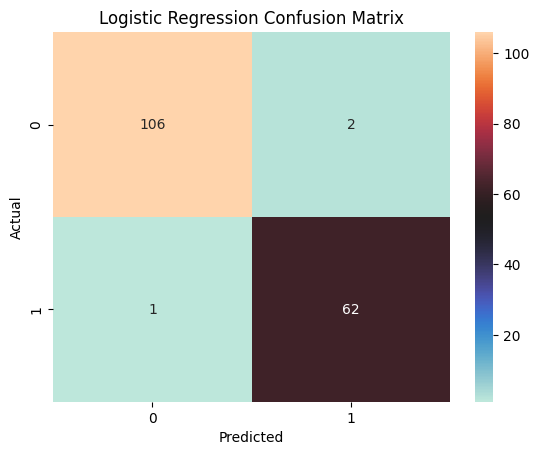

In [77]:
sns.heatmap(cm, annot=True,fmt='d', cmap='icefire')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**Gaussian Naive Bayes Classifier**

In [78]:
#trying naive bais for model prediction
from sklearn.naive_bayes import GaussianNB


In [79]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_predict = nb.predict(X_test)


In [80]:
y_test

,diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
69,0
542,0
176,0
501,1


In [81]:
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [82]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_predict)
print(f'{ac: .2f}')

 0.94


In [83]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [84]:
confuse = confusion_matrix(y_test,y_predict)
confuse

array([[103,   5],
       [  6,  57]])

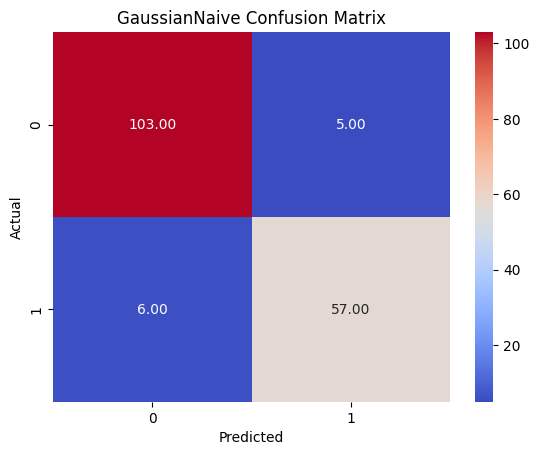

In [85]:
ax = sns.heatmap(confuse, annot=True, fmt='.2f', cmap= 'coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GaussianNaive Confusion Matrix")
plt.show()

**XGBoost Classifier**

In [86]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [87]:
xg.fit(X_train,y_train)
y_predict = xg.predict(X_test)
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [88]:
y_test

,diagnosis
204,0
70,1
131,1
431,0
540,0
...,...
69,0
542,0
176,0
501,1


In [89]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9707602339181286

In [90]:
print(f'{accuracy: .2f}')

 0.97


In [91]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [92]:
confuse = confusion_matrix(y_test,y_predict)
confuse

array([[105,   3],
       [  2,  61]])

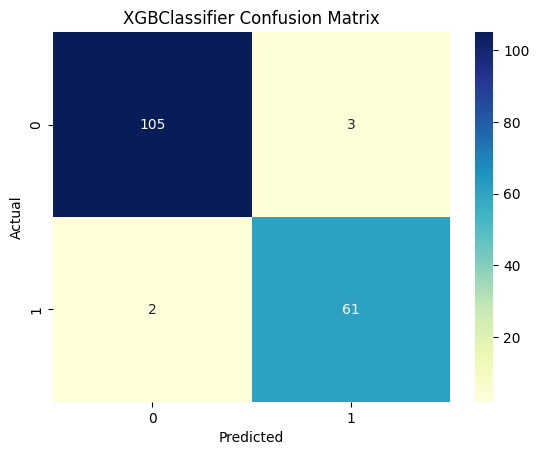

In [93]:
sns.heatmap(confuse, annot=True, fmt='d', cmap= 'YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBClassifier Confusion Matrix")
plt.show()

**ROC Curve and AUROC Evaluation**

In [94]:
# ROC Curve is a graph showing performance of a classifier at all thresholds.
# AUROC (Area Under ROC Curve) measures the classifier’s ability to distinguish between classes.
# A higher AUROC (closer to 1) means better performance.

from sklearn.metrics import roc_curve, roc_auc_score

In [95]:
# Prediction Probabilities
r_probs = [0 for _ in range(len(y_test))]
nb_probs = nb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
xg_probs = xg.predict_proba(X_test)

In [96]:
nb_probs = nb_probs[:,1]
lr_probs = lr_probs[:,1]
xg_probs = xg_probs[:,1]

In [97]:
r_auc = roc_auc_score(y_test, r_probs) # Calculate AUC scores
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
xg_auc = roc_auc_score(y_test, xg_probs)

In [98]:
#Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' %(r_auc))
print('Naive Bayes: AUROC =%.3f' %(nb_auc))
print('Logistic Regression: AUROC = %.3f' %(lr_auc))
print('XGBClassifier: AUROC = %.3f' %(xg_auc))

Random (chance) Prediction: AUROC = 0.500
Naive Bayes: AUROC =0.993
Logistic Regression: AUROC = 0.998
XGBClassifier: AUROC = 0.994


In [99]:
r_fpr, r_tpr, _ =roc_curve(y_test, r_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)


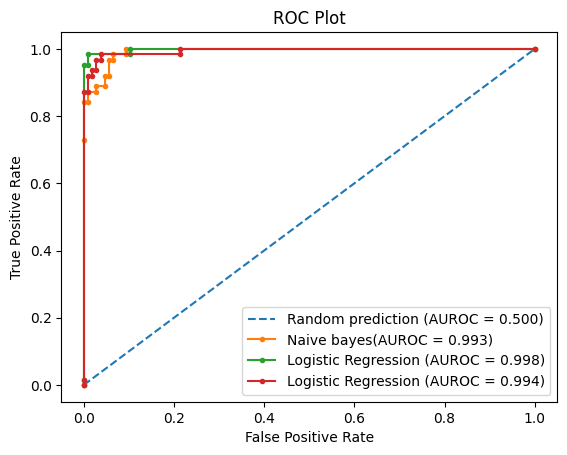

In [100]:
plt.plot(r_fpr, r_tpr, linestyle='--', label= 'Random prediction (AUROC = %0.3f)' %r_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive bayes(AUROC = %0.3f)' % nb_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label= 'Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(xg_fpr, xg_tpr, marker='.', label= 'Logistic Regression (AUROC = %0.3f)' % xg_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Hyperparameter Tuning with GridSearchCV (Logistic Regression)**

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
params_grid = {
    'C': [0.1, 1, 10],
    'multi_class': ['ovr', 'multinomial']
}
model = LogisticRegression()
grid_search = GridSearchCV(model, params_grid, cv=5)

In [105]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [106]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'multi_class': ['ovr', 'multinomial']})

In [107]:
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Best Hyperparameters (GridSearchCV):", best_params_grid)
print("Test Accuracy (GridSearchCV):", accuracy_grid)

Best Hyperparameters (GridSearchCV): {'C': 0.1, 'multi_class': 'multinomial'}
Test Accuracy (GridSearchCV): 0.9941520467836257


Project Definition:
This project aims to identify breast cancer as either **Malignant** or **Benign** using diagnostic data. Several classification algorithms—Logistic Regression, Naive Bayes, and XGBoost—are applied, compared, and evaluated using accuracy, classification reports, confusion matrices, and ROC-AUC scores. The best model is fine-tuned using GridSearchCV

Key Concepts:
- **Normalization:** Scaling features so that they have a mean of 0 and standard deviation of 1. This helps some machine learning models perform better and faster.
- **Logistic Regression:** A classification algorithm used to predict binary outcomes. It estimates the probability that a data point belongs to a certain class.
- **Evaluation:** We assess model performance using metrics like accuracy, classification report, and confusion matrix.
- **ROC Curve:** A plot showing how well a classifier can distinguish between two classes at various thresholds.
- **AUROC:** The area under the ROC curve. A higher value means the model is better at classification. 1.0 is perfect, 0.5 is random guessing.

---

Good Impact:
Early detection of breast cancer significantly improves treatment outcomes and survival rates. This model aids in automating and accelerating the diagnostic process, thereby potentially saving lives by enabling faster and more reliable detection of malignant tumors.
